#Modelos de Clasificación Lineal



##Linear Discriminant Analysis (LDA)

Empezamos observando un fenómeno cuando tenemos 2 posibles categorías de solución: Enfermo vs. Sano, Ganador vs. Perdedor, Team corridos tumbados vs. gente decente, etc.

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #esto es LDA
from sklearn.datasets import make_classification #para generar los datos

# con la función de make_classification() creamos un dataset sintético.
X, y = make_classification(n_samples=100, n_features=2,n_informative=2,n_redundant=0, n_classes=2, random_state=42)
print(y)

# Ajustamos el modelo de LDA.
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Utilizando el modelo, realizamos una predicción.
y_pred = lda.predict(X)
print(y_pred)

[0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0
 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0]
[0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0
 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0]


Padrísimo... ¿y eso qué? Pues... como podrán observar, podemos tratar de predecir el grupo al que pertenece una observación con el uso de un modelo lineal. Ahora... ¿Qué tal si quisieramos observar lo anterior?

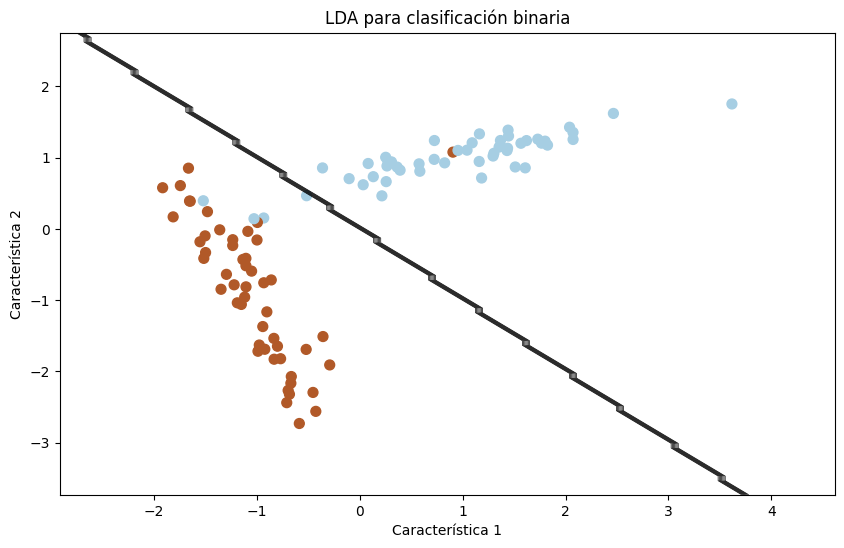

In [19]:
import numpy as np #Para poder graficar los límites de decisión
import matplotlib.pyplot as plt #graficador
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification

# Generamos un dataset sintético (aquí meteríamos nuestros datos)
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,  # número de características informativas (independientes)
    n_redundant=0,    # número de características redundantes.
    n_clusters_per_class=1,
    random_state=768
)

# Ajustamos el modelo de LDA.
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Iniciamos graficación
plt.figure(figsize=(10, 6))

## graficamos los datos (scatterplot de las características)
#plt.scatter(X[:, 0], X[:, 1], s=50) # s= tamaño de los puntos
# podemos ver los datos... pero no estamos considerando la respuesta.

##graficamos considerando la respuesta (lo de c=y)
plt.scatter(X[:, 0], X[:, 1],c=y, cmap=plt.cm.Paired, s=50)

## graficamos el límite de decisión (usaremos numpy)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', linestyles=['-'], linewidths=[0.5])

## nombres de las dimensiones
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('LDA para clasificación binaria')

plt.show()


Ahora veamos este caso pero cuando tenemos más de 2 respuestas en *y* (cuando tenemos una respuesta nominal de 3 o más categorías). Utilizaremos la base de datos de iris (I know... ¿porqué otra vez?)

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]
[[ 7.12868772  0.78666043]
 [ 7.48982797  0.26538449]
 [ 6.81320057  0.67063107]
 [ 8.13230933 -0.51446253]
 [ 7.70194674 -1.46172097]]


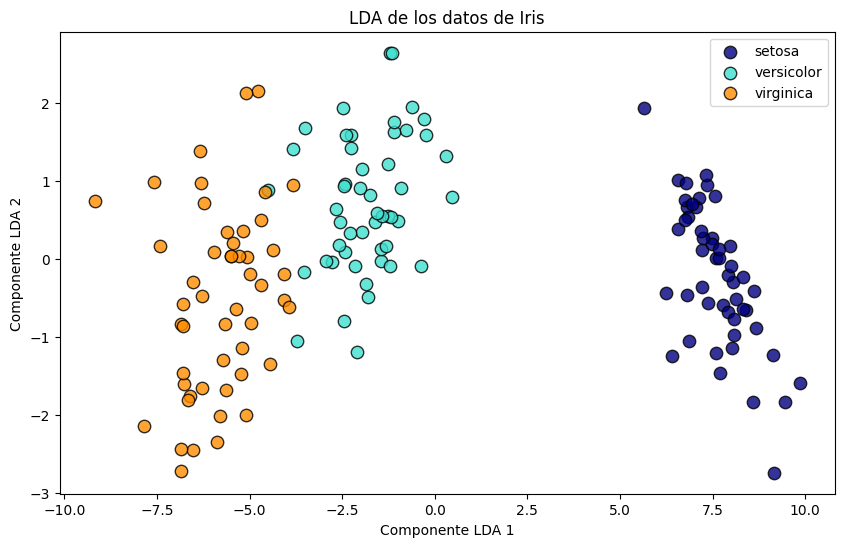

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

In [4]:
import numpy as np #utilizaremos funciones de análisis
import matplotlib.pyplot as plt #graficador
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA
from sklearn.datasets import load_iris #base de datos

# Cargamos la base de datos de iris.
iris = load_iris()
X = iris.data #consta de 4 columnas
y = iris.target #variable de clasificación con 3 nombres: setosa, versicolor y virginica
print(X[1:6,:])
# ajustamos el análisis de LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Aquí viene la magia, transportamos la matriz de datos X a las dimensiones
# del LDA (pasamos de tener 4 columnas a tener.... chan chan chan... 2)
X_lda = lda.transform(X)
print(X_lda[1:6,:])

# Graficamos los componenetes
plt.figure(figsize=(10, 6))

#predicción nueva
#y_pred = lda.predict([5.1231234,0.55])
#print(y_pred)

# Graficamos los datos de los componentes del LDA.
colors = ['navy', 'turquoise', 'darkorange']

#como podrán ver, a cada punto de datos le voy a asignar su valor en y
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                label=target_name, s=80, edgecolor='k')

plt.xlabel('Componente LDA 1')
plt.ylabel('Componente LDA 2')
plt.title('LDA de los datos de Iris')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

print(y)
print(X)
print(iris)

##Evaluación del Modelo

###Exactitud, Precisión, Sensibilidad y puntaje F1.

Hasta aquí todo ha estado relativamente simple, pero necesitamos alguna manera de evaluar si los métodos que acabamos de implementar son adecuados (ver si podemos ver que tan bueno o malo es nuestro modelo). Para ello, tenemos una mega-super-duper-hyper chipotluda herramienta: las funciones de evalaución de modelos que tiene sklearn.metrics. Veremos un ejemplo sintético chiquitillo y de ahí lo aplicaremos al que acabamos de hacer de Iris.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Sobre las pruebas:
## accuracy_score: compara la exactitud de los valores predichos vs. verdaderos
## precision_score: calcula el ratio de predichos verdaderos, sobre el número
#                   de valores predichos.
## recall_score: ratio de los predichos verdaderos, sobre el número de los
#               verdaderos reales.
## f1_score: saca la media armónica de la precisión y el recall y
#            genera un valor balanceado del comportamiento del modelo.

# Aquí vemos los valores de y (verdaderos) y los de y predichos
y_true = [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 1, 1, 0, 0]

# Exactitud
accuracy = accuracy_score(y_true, y_pred)
print(f'Exactitud: {accuracy:.2f}')

# Precisión
precision = precision_score(y_true, y_pred)
print(f'Precisión: {precision:.2f}')

# Tasa de recuperación (Proporción de verdaderos positivos)
recall = recall_score(y_true, y_pred)
print(f'Tasa de Recuperación: {recall:.2f}')

# Puntaje F1
f1 = f1_score(y_true, y_pred)
print(f'Puntaje F1: {f1:.2f}')


Exactitud: 0.60
Precisión: 0.60
Tasa de Recuperación: 0.60
Puntaje F1: 0.60


In [5]:
####Tenemos el caso con más de 2 respuestas de clasificación:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Ejemplo con y real vs y predicha
y_true = [0, 1, 1, 2, 2, 0, 1, 2, 0, 1]
y_pred = [0, 1, 0, 2, 1, 0, 1, 2, 0, 1]

# Exactitud
accuracy = accuracy_score(y_true, y_pred)
print(f'Exactitud: {accuracy:.2f}')

# Predicción (average='weighted' cuando tenemos más de 2 clases)
precision = precision_score(y_true, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Tasa de recuperación (average='weighted', misma historia)
recall = recall_score(y_true, y_pred, average='weighted')
print(f'Recall: {recall:.2f}')

# Puntaje F1 (average='weighted', adivinaron otra vez)
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1-score: {f1:.2f}')

# Reporte de clasificación (target_names= Es el nombre del número de categorías)
class_report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1', 'Class 2'])
print('Reporte de Clasificación:')
print(class_report)


Exactitud: 0.80
Precision: 0.82
Recall: 0.80
F1-score: 0.80
Reporte de Clasificación:
              precision    recall  f1-score   support

     Class 0       0.75      1.00      0.86         3
     Class 1       0.75      0.75      0.75         4
     Class 2       1.00      0.67      0.80         3

    accuracy                           0.80        10
   macro avg       0.83      0.81      0.80        10
weighted avg       0.82      0.80      0.80        10



Ahora, aplicado a lo que hicimos en iris:

In [21]:
#Necesitamos los valores de y y de y_pred:

y_iris = iris.target
y_prediris = lda.predict(X)

#Copio y pego el código que está arriba:

# Exactitud
accuracy = accuracy_score(y_iris, y_prediris)
print(f'Exactitud: {accuracy:.2f}')

# Precisión
precision = precision_score(y_iris, y_prediris, average='weighted')
print(f'Precisión: {precision:.2f}')

# Tasa de recuperación (Proporción de verdaderos positivos)
recall = recall_score(y_iris, y_prediris, average='weighted')
print(f'Tasa de Recuperación: {recall:.2f}')

# Puntaje F1
f1 = f1_score(y_iris, y_prediris, average='weighted')
print(f'Puntaje F1: {f1:.2f}')

# Reporte de clasificación (target_names= Es el nombre del número de categorías)
class_report = classification_report(y_iris, y_prediris, target_names=iris.target_names)
print('Reporte de Clasificación:')
print(class_report)



Exactitud: 0.98
Precisión: 0.98
Tasa de Recuperación: 0.98
Puntaje F1: 0.98
Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



¿Cómo lo interpretamos?
El valor de exactitud no sirve pero cuidado, cuando tenemos un dataset desbalanceado (una categoría más grande que las demás), este valor se vuelve inapropiado para evaluar el modelo.

Precisión sirve cuando tenemos que cuidarnos de cometer errores donde tengamos falsos positivos (donde nos salga caro equivocarnos).

Tasa de Recuperación (sensibilidad) sirve cuando tenemos que poder detectar todos los casos reales posibles (donde sale caro equivocarnos al no identificar un caso específico).

Puntaje F1, cuando nos preocupa el balance de precisión y de sensibilidad. Es un buen evaluador cuando te preocupa equivocarte por detectar algo que no es o cuando no detectas algo que es.

###Validación cruzada.
No hay mucho que decir, separas una parte de tus observaciones (training set o set de entrenamiento) y tratas de predecir (con tu nuevo modelo) el set de prueba (test set). A continuación un ejemplo simple.

In [22]:
from sklearn.datasets import load_iris #datos de iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA
from sklearn.model_selection import cross_val_score #método de validación cruzada

#Tomemos iris como nuestros datos:

# esto ya lo hicimos antes
iris = load_iris()
X = iris.data
y = iris.target

# construimos la función de LDA con la función
lda = LinearDiscriminantAnalysis()

# Elegimos el número de folds (repeticiones) que queremos
k = 30
#computamos el valor de validación cruzada:
cross_val_scores = cross_val_score(lda, X, y, cv=k, scoring='accuracy')

# Imprimimos el puntaje de VC (valores de 0 a 1)
print("Puntaje de validación cruzada:", cross_val_scores)
print("Precisión promedio:", cross_val_scores.mean())
print("Desviación estándar de la precisión:", cross_val_scores.std())


Puntaje de validación cruzada: [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.8 1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  0.6 1.  1.  1.  1.  1.  1.  1.  1. ]
Precisión promedio: 0.98
Desviación estándar de la precisión: 0.07916228058025279


### Curva ROC y AUC
La curva ROC (curva del funcionamiento del receptor) es una herramienta de evaluación cuando tenemos una clasificación binaria (estrictamente binaria!!!). Trata de establecer la evaluación entre los valores TPR y FPR. Los valores positivos verdaderos (TPR) los valores que son considerados positivos correctamente por el modelo. Se calcula como:
$$
TPR=\frac{TP}{TP-FN}
$$
Por su parte los valores falsos positivos (FPR) son los valores incorrectamente clasficiados por el modelo. Este se calcula como:
$$
FPR=\frac{FP}{FP-TN}
$$

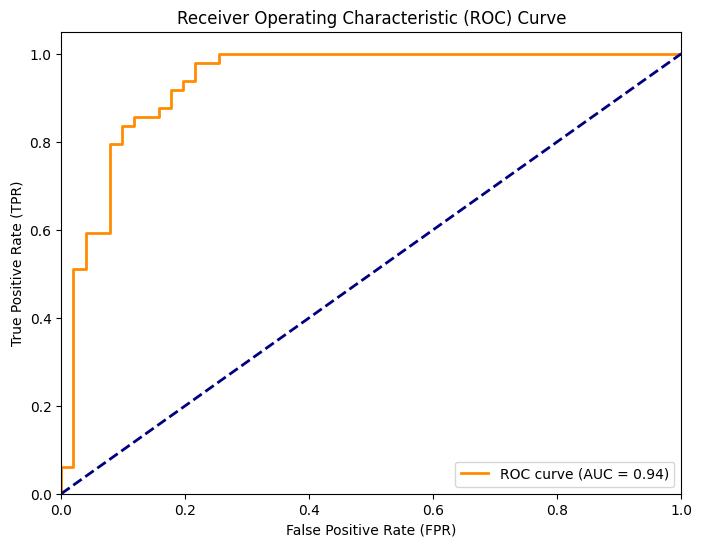

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np #Para poder graficar los límites de decisión
import matplotlib.pyplot as plt #graficador
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification

# Generamos un dataset sintético (aquí meteríamos nuestros datos)
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,  # número de características informativas (independientes)
    n_redundant=0,    # número de características redundantes.
    n_clusters_per_class=1,
    random_state=866
)

# Ajustamos el modelo de LDA.
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
# Calculate ROC curve and AUC
y_proba = lda.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, y_proba[:, 1])
auc = roc_auc_score(y, y_proba[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


La interpretación de la curva ROC y del AUC.
IF el AUC es aproximadamente igual a 0.5, significa que el modelo no discrimina mejor que la suerte, si el valor es mayor a 0.5 el modelo discrimina mejor que si la selección se hiciera al azar. Si el valor es cercano a 1, significa que el modelo discrimina adecuadamente.

## Regresión Logística Binaria
Este es un método estadístico de regresión que se utiliza para predecir el comportamiento de una variable con dos posibles respuestas.

<bound method NDFrame.head of      Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
886       2    male  27.0  13.0000
887       1  female  19.0  30.0000
888       3  female   NaN  23.4500
889       1    male  26.0  30.0000
890       3    male  32.0   7.7500

[891 rows x 4 columns]>
<bound method NDFrame.head of      Pclass   Age     Fare  Sex_male
0         3  22.0   7.2500         1
1         1  38.0  71.2833         0
2         3  26.0   7.9250         0
3         1  35.0  53.1000         0
4         3  35.0   8.0500         1
..      ...   ...      ...       ...
886       2  27.0  13.0000         1
887       1  19.0  30.0000         0
888       3   NaN  23.4500         0
889       1  26.0  30.0000         1
890       3  32.0   7.7500         1

[891 rows x 4 columns]>
<bound method NDFrame.head

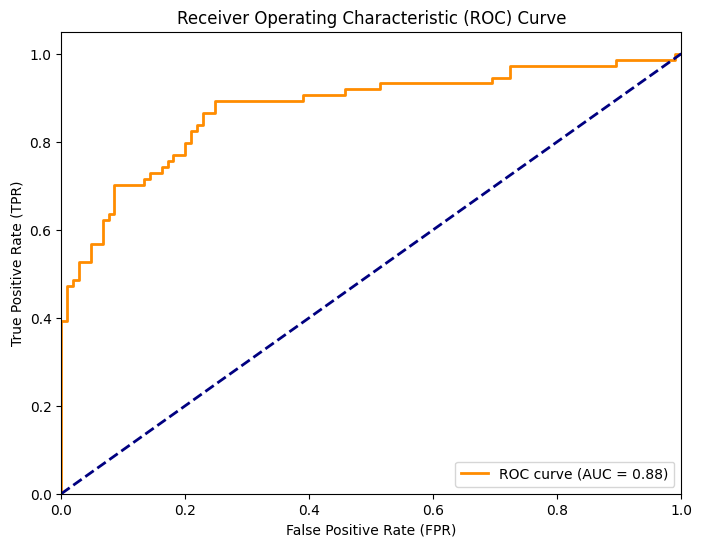

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #generar set de prueba
from sklearn.linear_model import LogisticRegression #regresión logística
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Cargar los datos del dataset del Titanic.
# Si lo encuentran en algún lugar del internet (como github),
# Pueden hacer lo siguiente:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/mrBronnWow/Curso_Beginners/main/1_Dataset_titanic/train.csv')

# Preprocesamiento de los datos
# Seleccionamos las covariables de interés y la variable respuesta.
features = ['Pclass', 'Sex', 'Age', 'Fare']
X = titanic_data[features]
y = titanic_data['Survived']
print(X.head)
#Convertimos la variable categórica de Género en numérica (con get_dummies())
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
print(X.head)

# Los valores faltantes de edad, los suplimos con la mediana
X['Age'].fillna(X['Age'].median(), inplace=True)
print(X.head)

# Pasado el procesamiento, partimos los datos en sets de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo de regresión logística.
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Realizamos predicciones con el set de prueba.
y_pred = logistic_model.predict(X_test)

# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Curva ROC y calculamos el AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Realizamos el gráfico de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#Sólo nos faltó ver el modelo (extensión del snippet anterior):

# Obtenemos el intercepto
intercepto = logistic_model.intercept_

# Obtenemos el valor de los coeficientes:
coeficientes = logistic_model.coef_



# Mostramos ambos en un output.
print("Intercepto:", intercepto)
print("Coeficientes:", coeficientes)



Intercepto: [3.96670897]
Coeficientes: [[-9.96326382e-01 -2.51628741e-02  1.18257900e-03 -2.46560624e+00]]


En este caso, el modelo quedaría definido de la siguiente manera:
$$
logit = L_i=\beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_3+\beta_4X_4
$$

con: $\beta_0=3.96$, $\beta_1=-0.996$, $\beta_2=-0.025$,$\beta_3=0.0011$ y $\beta_4=-2.465$.

El modelo final es:

$$
logit = L_i=3.96-0.996X_1-0.025X_2+0.0011X_3-2.465X_4
$$